<a href="https://colab.research.google.com/github/JungYeoni/tobigs-25th/blob/main/Week2%20/ML_DL/WEEK2_1%EA%B5%90%EC%8B%9C_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML/DL (2주차 1교시)**

## Q1. 이론문제(서술형)

과거에는 시그모이드(Sigmoid) 함수를 주로 사용했으나, 최근 딥러닝(Deep Learning) 모델에서는 은닉층의 활성화 함수로 주로 ReLU를 사용합니다. 층이 깊은 모델에서 시그모이드를 사용할 때 발생하는 '기울기 소실(Vanishing Gradient)' 문제란 무엇이며, ReLU가 이를 어떻게 해결하는지 서술해주세요.

[답변 작성란]

1. 기울기 소실(Vanishing Gradient) 문제란?    
시그모이드 함수는 입력값을 0과 1사이로 변환하는 비선형 활성화 함수이다.

하지만 시그모이드 함수의 도함수를 확인해보면, 최댓값은 0.25이고 입력값이 매우 크거나 작을 경우에는 0에 가까워지는 것을 확인할 수 있다. (아래 셀의 그래프 확인)

층이 깊은 신경망에서는 역전파 과정에서 각 층의 기울기를 연쇄법칙으로 계속 곱하게 되는데, 이 때 각 항이 1보다 작은 값이 되면 깊은 층으로 갈수록 기울기가 점점 작아지게 된다. 그 결과, 초기 층의 가중치는 거의 업데이트 되지 않거나 학습이 매우 느려지는 등 깊은 신경망에서 성능 저하가 발생하게 된다. 이러한 현상을 기울기 소실 문제라고 한다.

2. ReLU의 해결 방식  
ReLU 함수는 입력값이 음수일 때는 0을 출력하고, 양수일 때는 해당 입력값을 그대로 출력하는 활성화 함수이다.
시그모이드 함수는 도함수가 항상 1보다 작은 값이기 때문에 역전파 과정에서 작은 값이 계속 곱해져 기울기가 소실하는 반면 ReLU는 양수 구간에서는 도함수가 1이기 때문에 기울기가 줄어들지 않고 그대로 전달된다. 이를 통해 깊은 신경망에서도 기울기가 유지되어 기울기 소실 문제를 해결할 수 있다.

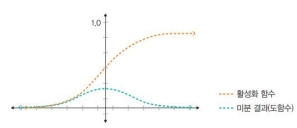

## Q2. 개념 구현

MNIST 손글씨 분류기 만들기 & 최적화 기법 비교

### 0. 환경 설정 및 데이터 로드

실습에 필요한 라이브러리를 불러오고, MNIST 데이터셋을 다운로드합니다.

이 셀은 수정하지 말고 그대로 실행해주세요.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

# 1. 시드 고정
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 시드 적용
set_seed(42)

# 2. 데이터셋 로드 (MNIST)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# 훈련 데이터
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 테스트 데이터
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 데이터 확인
print(f"Train Data Size: {len(trainset)}")
print(f"Test Data Size: {len(testset)}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 43.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.28MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]

Train Data Size: 60000
Test Data Size: 10000


### [문제 1] CNN 모델 구조 설계 (빈칸 채우기)

강의에서 배운 CNN 구조를 조금 더 깊게 만들어 봅니다.

2단 레이어(Conv-Pool-Conv-Pool) 구조를 직접 설계해 주세요.

[구현 조건]

1. Layer 1: Conv(1 $\to$ 32ch) $\to$ ReLU $\to$ MaxPool

2. Layer 2: Conv(32 $\to$ 64ch) $\to$ ReLU $\to$ MaxPool

3. FC Layer: Flatten 후 10개의 클래스로 분류

[힌트: 차원 계산]

- 입력: `28x28`

- Layer 1 통과 후 (Pool): `14x14`

- Layer 2 통과 후 (Pool): `?`

In [11]:
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()

        # ==========================================
        # [TODO 1] 2단 레이어 구조 완성하기
        # ==========================================

        # Layer 1: 입력 1채널 -> 출력 32채널
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Layer 2: 입력 32채널 -> 출력 64채널
        self.layer2 = nn.Sequential(
            # 힌트: Conv2d(in, out, kernel, padding=1)
            # 힌트: MaxPool2d(kernel)
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # FC Layer
        # 최종 Feature Map 크기 계산: 28 -> 14 -> 7
        # 따라서 64채널 * 7 * 7 크기가 됨
        self.fc = nn.Linear(64 * 7 * 7, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)

        # Flatten (1차원으로 펼치기)
        x = x.view(x.size(0), -1)

        x = self.fc(x)
        return x

# 모델 생성 및 구조 확인
model = DeepCNN()
print(model)

DeepCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)


### [문제 2] 학습 루프(Training Loop) 완성하기

딥러닝 모델 학습의 핵심인 경사하강법(Gradient Descent) 3단계를 코드로 구현해 주시면 됩니다.

- Step 1: 기울기 초기화 (`zero_grad`)

- Step 2: 역전파를 통한 기울기 계산 (`backward`)

- Step 3: 가중치 업데이트 (`step`)

In [12]:
def train_model(model, optimizer, criterion, epochs=3, model_name="Model"):
    loss_history = []
    model.train() # 학습 모드 전환

    print(f"=== {model_name} Training Start ===")

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:

            # ==========================================
            # [TODO 2] 경사하강법 3단계 구현하기
            # ==========================================

            # 1. 이전 배치의 기울기 초기화
            optimizer.zero_grad()

            # 순전파 (Forward) 및 Loss 계산
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 2. 역전파 (Backward) - 기울기 계산
            loss.backward()

            # 3. 파라미터 업데이트 (Step)
            optimizer.step()

            running_loss += loss.item()

        # 에포크별 평균 Loss 저장
        epoch_loss = running_loss / len(train_loader)
        loss_history.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{epochs}] Loss: {epoch_loss:.4f}")

    return loss_history

### [문제 3] Optimization 비교: SGD vs Adam

위에서 만든 `train_model` 함수를 사용하여 SGD와 Adam Optimizer의 성능을 비교해 봅니다.

- 실험 A: SGD (Learning Rate = 0.01)

- 실험 B: Adam (Learning Rate = 0.001)

=== SGD Training Start ===
Epoch [1/3] Loss: 0.5858
Epoch [2/3] Loss: 0.1867
Epoch [3/3] Loss: 0.1325
=== Adam Training Start ===
Epoch [1/3] Loss: 0.1631
Epoch [2/3] Loss: 0.0496
Epoch [3/3] Loss: 0.0359


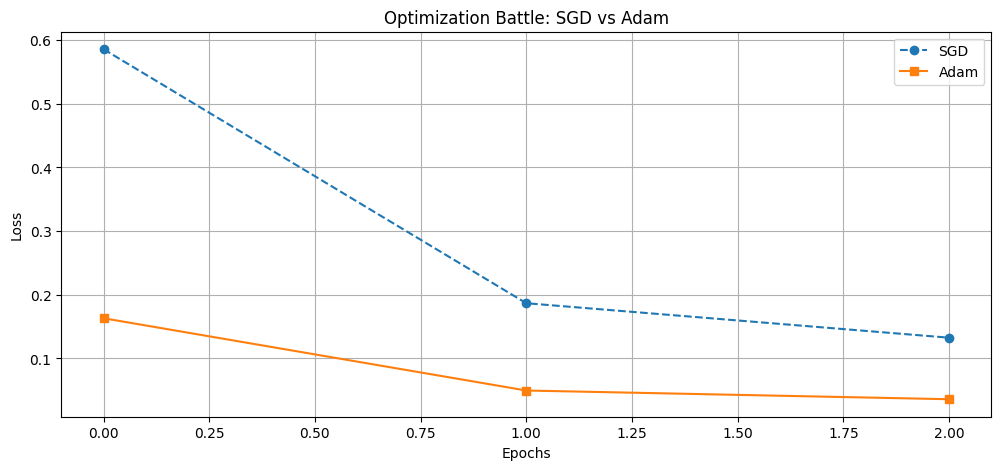

In [14]:
# 공통 손실 함수
criterion = nn.CrossEntropyLoss()

# -------------------------------------------------
# CASE A: SGD Optimizer
# -------------------------------------------------
set_seed(42) # 시드 초기화 (공정한 비교 위해)
model_sgd = DeepCNN()

# [TODO 3-1] SGD Optimizer 설정 (lr=0.01)
optimizer_sgd = torch.optim.SGD(model_sgd.parameters(), lr=0.01)

sgd_losses = train_model(model_sgd, optimizer_sgd, criterion, epochs=3, model_name="SGD")

# -------------------------------------------------
# CASE B: Adam Optimizer
# -------------------------------------------------
set_seed(42) # 시드 초기화
model_adam = DeepCNN()

# [TODO 3-2] Adam Optimizer 설정 (lr=0.001)
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.001)

adam_losses = train_model(model_adam, optimizer_adam, criterion, epochs=3, model_name="Adam")


# -------------------------------------------------
# 결과 시각화
# -------------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(sgd_losses, label='SGD', marker='o', linestyle='--')
plt.plot(adam_losses, label='Adam', marker='s')
plt.title('Optimization Battle: SGD vs Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Q. 그래프를 보고 알 수 있는 점에 대해 작성해주세요.

- SGD: 각 에포크마다 감소폭이 일정하지 않고, Adam에 비해서 상대적으로 수렴속도가 느린 것을 확일 할 수 있다.

- Adam: 학습 초반부터 안정적으로 낮은 손실값을 보이고, SGD보다 빠른 속도로 최적값에 다가가는 것을 확인할 수 있다.